In [63]:
#"C:\Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\Customer Purchases"
import os
for dirname, _, filenames in os.walk('C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan Default Dataset.txt
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefault.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefaultv1.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefaultv2.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\LoanDefaultv3.ipynb
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default.csv
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default.rar
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default_Cleaned.csv
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default_Cleanedwork temp.xlsx
C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\Loan_Default_Cleaned_Si

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

path_archivos='C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault'

In [65]:
print (filenames)

['Loan Default Dataset.txt', 'LoanDefault.ipynb', 'LoanDefaultv1.ipynb', 'LoanDefaultv2.ipynb', 'LoanDefaultv3.ipynb', 'Loan_Default.csv', 'Loan_Default.rar', 'Loan_Default_Cleaned.csv', 'Loan_Default_Cleanedwork temp.xlsx', 'Loan_Default_Cleaned_Sin_Outliers.csv', 'Loan_Default_Cleaned_Sin_Outliers_Condicional - Copy.xlsx', 'Loan_Default_Cleaned_Sin_Outliers_Condicional.csv', 'Tipos de variables.xlsx']


In [66]:
#advertencia de las lineas qe no carga
df=pd.read_csv("C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\loan_default.csv",sep=',', on_bad_lines='warn')


In [67]:
#lineas erradas que no carga. 
df=pd.read_csv("C:/Users\pachecsa\OneDrive - Universidad de Las Américas\Proyecto\LoanDefault\loan_default.csv", sep=',', on_bad_lines='skip')

In [68]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

## Limpieza y Preparación de Datos
### Eliminación de Columnas No Útiles
Identificaremos las columnas que no contribuyen a nuestro análisis o entrenamiento del modelo. Estas podrían ser columnas con un solo valor único, un alto porcentaje de valores faltantes, o información irrelevante (por ejemplo, identificadores).

### Manejo de Valores Faltantes
Los valores faltantes se pueden manejar de diversas maneras dependiendo de la naturaleza de los datos y la extensión de los valores faltantes. Las estrategias comunes incluyen:

Eliminar filas o columnas con valores faltantes.
- Imputar valores faltantes usando la media, mediana para datos numéricos.
- Usar un valor constante o el valor más frecuente para datos categóricos.

### Conversión de Columnas con tipos de datos String a numéricos
Se convierte estas columnas a formato numérico usando pd.to_numeric. Si hay valores no numéricos, los manejaremos adecuadamente (por ejemplo, reemplazándolos con NaN).

In [71]:
# Verificar los tipos de datos de las columnas
print(df.dtypes)

# Paso 2: Convertir columnas a números
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir y manejar errores (valores no convertibles serán NaN)
for columna in columnas_a_convertir:
    df[columna] = pd.to_numeric(df[columna], errors='coerce')

# Verificar las conversiones
print(df.dtypes)
print(df[columnas_a_convertir].head())

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In [72]:
#  Eliminación de Columnas No Útiles
# Verificar columnas con un solo valor único o alto porcentaje de valores faltantes
conteo_unicos = df.nunique()
porcentaje_faltantes = df.isnull().mean() * 100

print("Conteo de valores únicos por columna:\n", conteo_unicos)
print("\nPorcentaje de valores faltantes por columna:\n", porcentaje_faltantes)

Conteo de valores únicos por columna:
 ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type 

In [73]:
# Criterios de eliminación de columnas:
# - Columnas con un solo valor único
# - Columnas con más del 50% de valores faltantes
columnas_a_eliminar = conteo_unicos[conteo_unicos == 1].index.tolist() + porcentaje_faltantes[porcentaje_faltantes > 50].index.tolist()

# Eliminar estas columnas
datos_limpios = df.drop(columns=columnas_a_eliminar)

print("\nColumnas eliminadas: ", columnas_a_eliminar)
print("\nDatos después de eliminar columnas:")
print(datos_limpios.info())


Columnas eliminadas:  ['year']

Datos después de eliminar columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges  

In [74]:
# Verificar los tipos de datos de las columnas
print(datos_limpios.dtypes)

# Paso 2: Convertir columnas a números
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges','term','property_value','income','LTV','dtir1']

# Convertir y manejar errores (valores no convertibles serán NaN)
for columna in columnas_a_convertir:
    datos_limpios[columna] = pd.to_numeric(datos_limpios[columna], errors='coerce')

# Verificar las conversiones
print(datos_limpios.dtypes)
print(datos_limpios[columnas_a_convertir].head())

ID                             int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
s

In [75]:
# Eliminar la columna  ID
datos_limpios.drop(columns=["ID"])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [76]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              147762 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148536 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  Upfront_charges            109028 non-null  float64
 13  term                       14

In [77]:
#  Manejo de Valores Faltantes
# Para columnas numéricas, llenar valores faltantes con la mediana
columnas_numericas = datos_limpios.select_dtypes(include='number').columns
datos_limpios[columnas_numericas] = datos_limpios[columnas_numericas].fillna(datos_limpios[columnas_numericas].median())

# Para columnas categóricas, llenar valores faltantes con la moda
columnas_categoricas = datos_limpios.select_dtypes(include='object').columns
datos_limpios[columnas_categoricas] = datos_limpios[columnas_categoricas].apply(lambda x: x.fillna(x.mode()[0]))

print("\nDatos después de llenar valores faltantes:")
print(datos_limpios.info())


Datos después de llenar valores faltantes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   loan_limit                 148670 non-null  object 
 2   Gender                     148670 non-null  object 
 3   approv_in_adv              148670 non-null  object 
 4   loan_type                  148670 non-null  object 
 5   loan_purpose               148670 non-null  object 
 6   Credit_Worthiness          148670 non-null  object 
 7   open_credit                148670 non-null  object 
 8   business_or_commercial     148670 non-null  object 
 9   loan_amount                148670 non-null  int64  
 10  rate_of_interest           148670 non-null  float64
 11  Interest_rate_spread       148670 non-null  float64
 12  Upfront_charges            148670 non-null

In [78]:
# Mostrar las primeras filas del conjunto de datos y los nombres de las columnas
print(datos_limpios.head())
print(datos_limpios.columns)

# Eliminar la columna ID si existe
if 'ID' in datos_limpios.columns:
    datos_limpios = datos_limpios.drop(columns=['ID'])
    print("Columna 'ID' eliminada.")
else:
    print("Columna 'ID' no encontrada.")

# Mostrar las primeras filas después de eliminar la columna ID
print(datos_limpios.head())



      ID loan_limit             Gender approv_in_adv loan_type loan_purpose  \
0  24890         cf  Sex Not Available         nopre     type1           p1   
1  24891         cf               Male         nopre     type2           p1   
2  24892         cf               Male           pre     type1           p1   
3  24893         cf               Male         nopre     type1           p4   
4  24894         cf              Joint           pre     type1           p1   

  Credit_Worthiness open_credit business_or_commercial  loan_amount  ...  \
0                l1        nopc                  nob/c       116500  ...   
1                l1        nopc                    b/c       206500  ...   
2                l1        nopc                  nob/c       406500  ...   
3                l1        nopc                  nob/c       456500  ...   
4                l1        nopc                  nob/c       696500  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0  

### Renombrar las columnas para mejor entendimiento. 

In [79]:
# Renombrar la columna 'LTV' a 'LoanToValueProperty'
datos_limpios.rename(columns={'LTV': 'LoanToValueProperty'}, inplace=True)
datos_limpios.rename(columns={'dtir1': 'DebToIncomeRatio'}, inplace=True)


## Guardar el nuevo Dataset Limpio y tratado

In [80]:
# Guardar el conjunto de datos limpio
ruta_archivo_limpio = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned.csv'
datos_limpios.to_csv(ruta_archivo_limpio, index=False)

print(f"Datos limpios guardados en {ruta_archivo_limpio}")

Datos limpios guardados en C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned.csv


## Justificaciones:
### Eliminación de Columnas No Útiles:

- Columnas con un Solo Valor Único: Estas columnas no proporcionan variabilidad y, por lo tanto, no son útiles para el análisis o modelado, en este ejemplo la columan "ID" y "Year"
- Columnas con Alto Porcentaje de Valores Faltantes (>50%): Imputar estas columnas puede introducir sesgo significativo o ruido, por lo que es mejor eliminarlas., en este caso no tenemos columnas que cumplan con esta limitación. 
- Columna ID: Esta columna contiene valores únicos para identificar cada fila del conjunto de datos, pero no aporta información útil para la predicción del objetivo. Su presencia podría añadir ruido y afectar el rendimiento del modelo.
- Columna Year: Esta columna tiene solo un valor por lo que no resulta relevante.

### Manejo de Valores Faltantes:

- Columnas Numéricas: Llenar valores faltantes con la mediana es robusto ante valores atípicos y preserva la distribución de los datos.
- Columnas Categóricas: Llenar valores faltantes con la moda (valor más frecuente) asegura que la imputación sea consistente con la categoría más común en los datos.

### Conversión de Tipo de Datos
- Conversión de Cadenas a Números: Las columnas que representan valores numéricos deben ser convertidas a formato numérico para permitir cálculos y análisis correctos.
- Manejo de Errores: Usar pd.to_numeric con el parámetro errors='coerce' convierte los valores no numéricos a NaN, permitiendo su manejo posterior (por ejemplo, imputación de valores faltantes).

### Muestra del Dataset de los datos limpios y las primeras columnas con su información  

In [81]:
print(datos_limpios.isnull().sum())  # Identify missing values in each column
datos_limpios.head()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LoanToValueProperty          0
Region                       0
Security_Type                0
Status                       0
DebToIncomeRatio             0
dtype: i

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LoanToValueProperty,Region,Security_Type,Status,DebToIncomeRatio
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,...,EQUI,552,EXP,55-64,to_inst,75.135870,North,direct,1,39.0
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


### Identificación de la Variable Objetivo 
- Predicción del Estado del Préstamo: La variable Status es crucial porque representa el resultado que estamos tratando de predecir. En un análisis de riesgo de crédito, por ejemplo, predecir si un préstamo será aprobado o caerá en incumplimiento (Defaulted) es fundamental.
- Evaluación de Modelos: Al construir modelos de clasificación, la precisión y otros métricas de rendimiento se evaluarán en función de la capacidad del modelo para predecir correctamente los valores de Status.

In [82]:
# Confirmar la variable objetivo 'Status' y revisar sus valores únicos
if 'Status' in datos_limpios.columns:
    print("\nVariable objetivo 'Status' encontrada.")
    print("Valores únicos en 'Status':", datos_limpios['Status'].unique())
else:
    print("\nVariable objetivo 'Status' no encontrada.")


Variable objetivo 'Status' encontrada.
Valores únicos en 'Status': [1 0]


## Gráfica de Variables

### Distribución de la Variable Objetivo (Status)

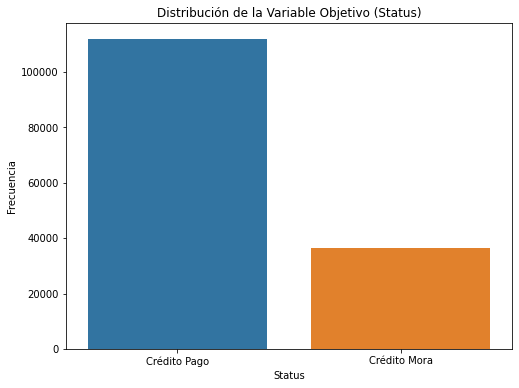

In [83]:
# Grafico de barras para la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=datos_limpios, x='Status')
plt.title('Distribución de la Variable Objetivo (Status)')
plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de las Variables Numéricas

Gráficas de las distribuciones de las variables Numéricas y de las variables Categóricas. 

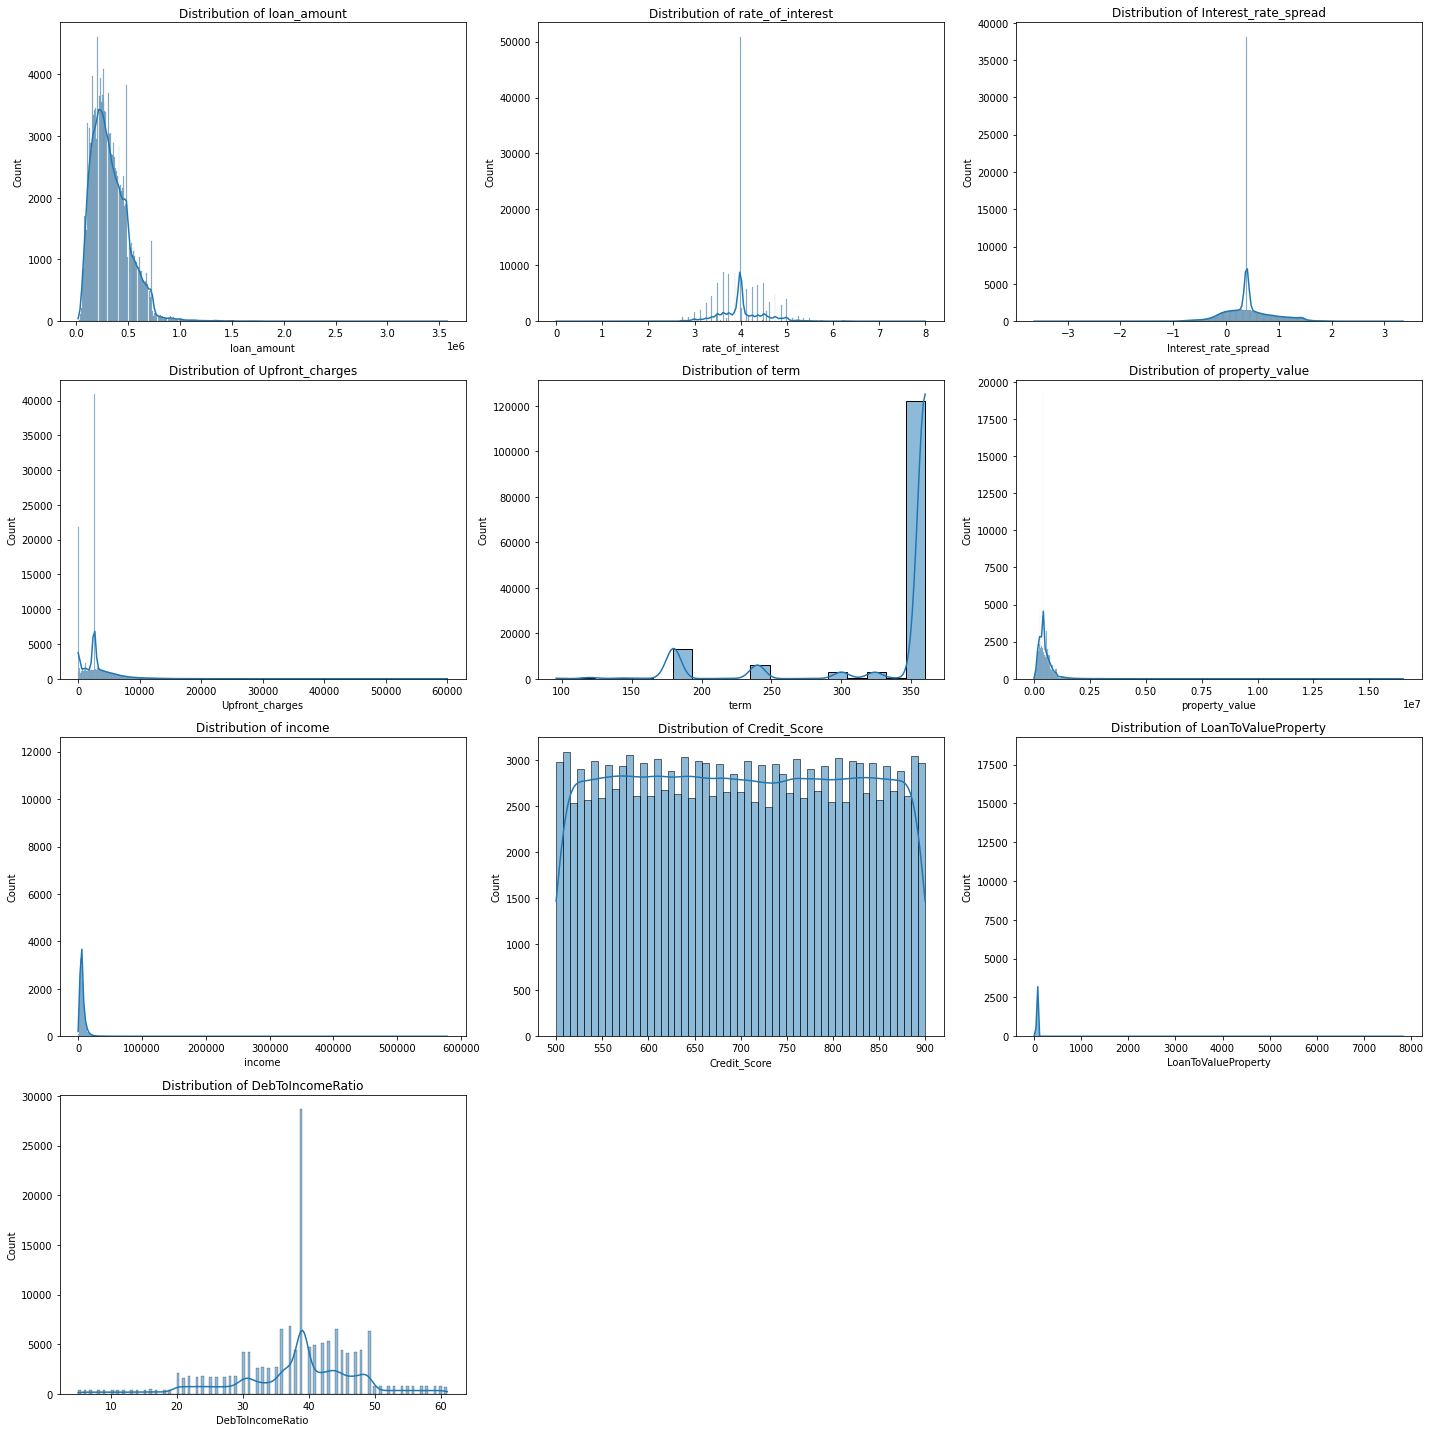

In [84]:
# Identificar características numéricas
variables_numericas = datos_limpios.select_dtypes(include=['float64', 'int64']).columns

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features (X) and target (y)
X = datos_limpios.drop('Status', axis=1)
y = datos_limpios['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


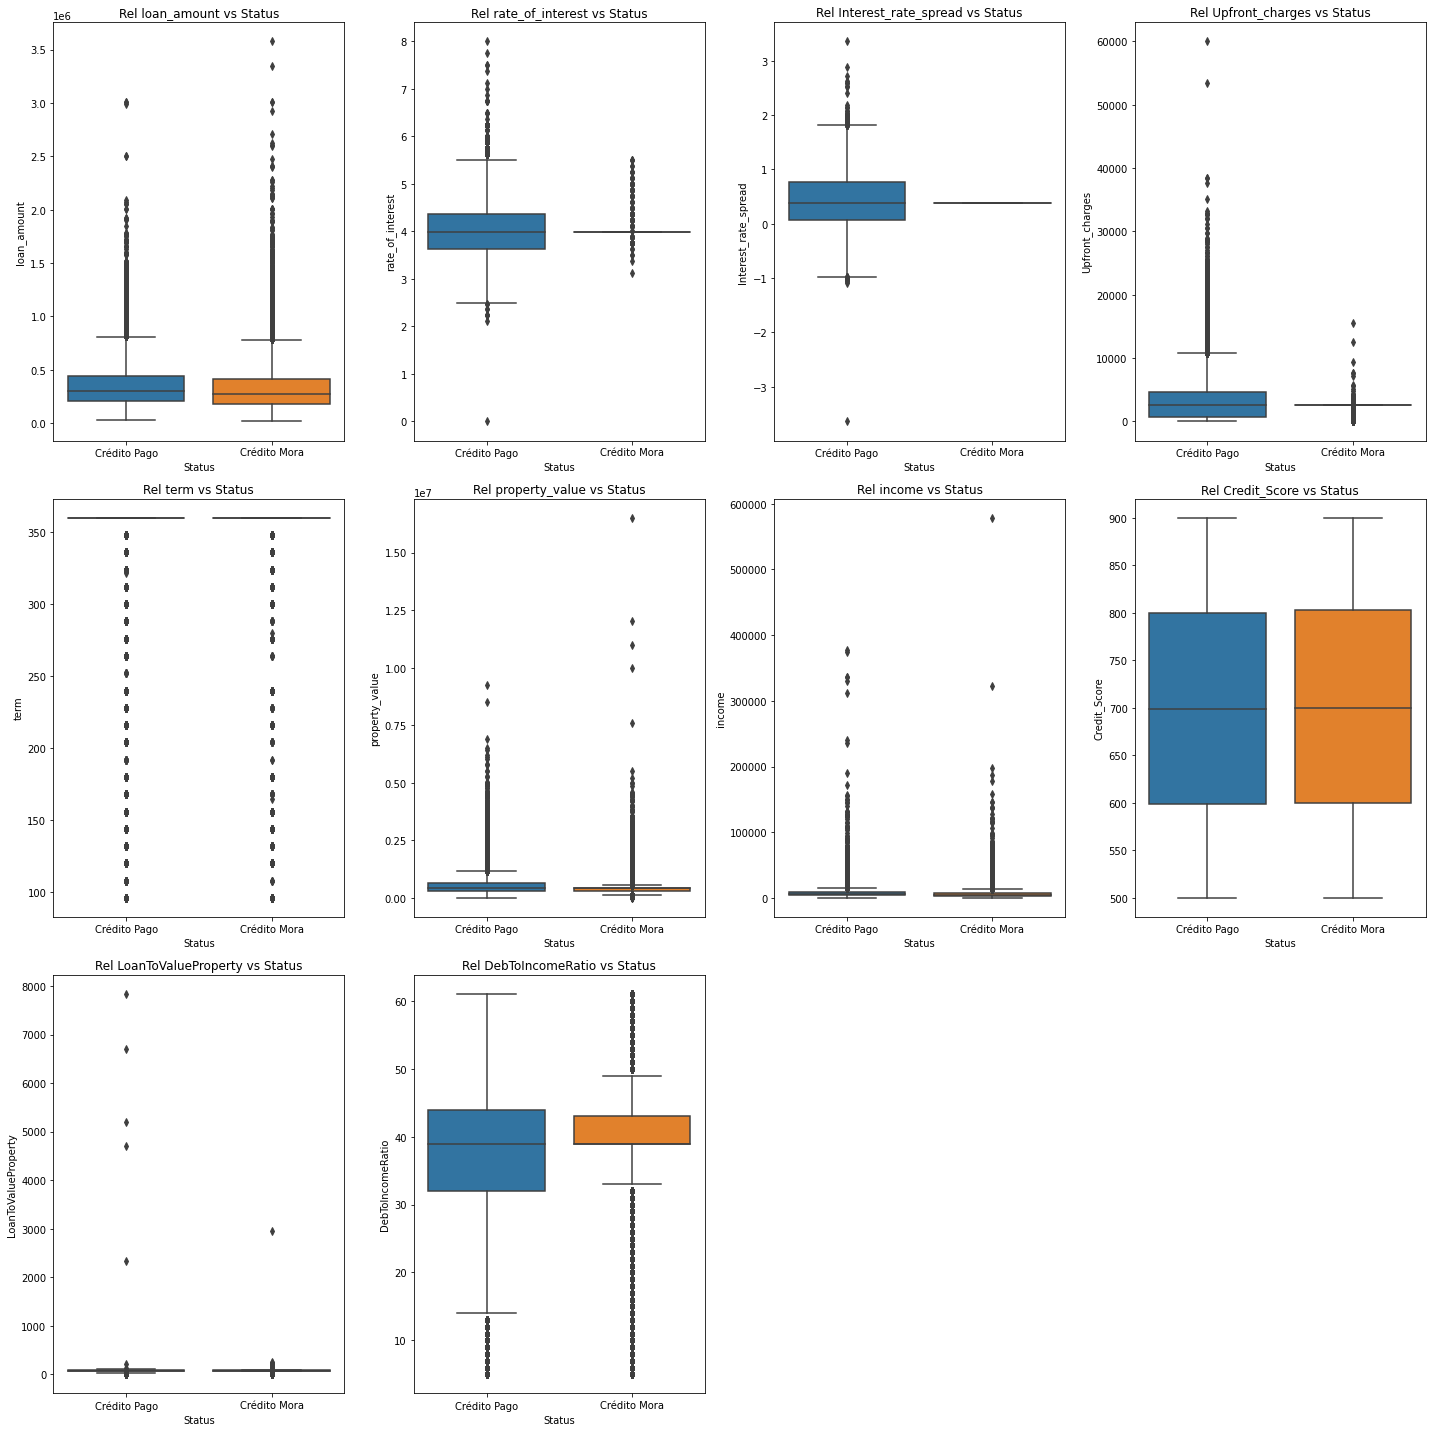

In [167]:
# Plot relationships between numerical features and target variable - CONSOLIDADO. 
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_limpios)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

<Figure size 1440x2520 with 0 Axes>

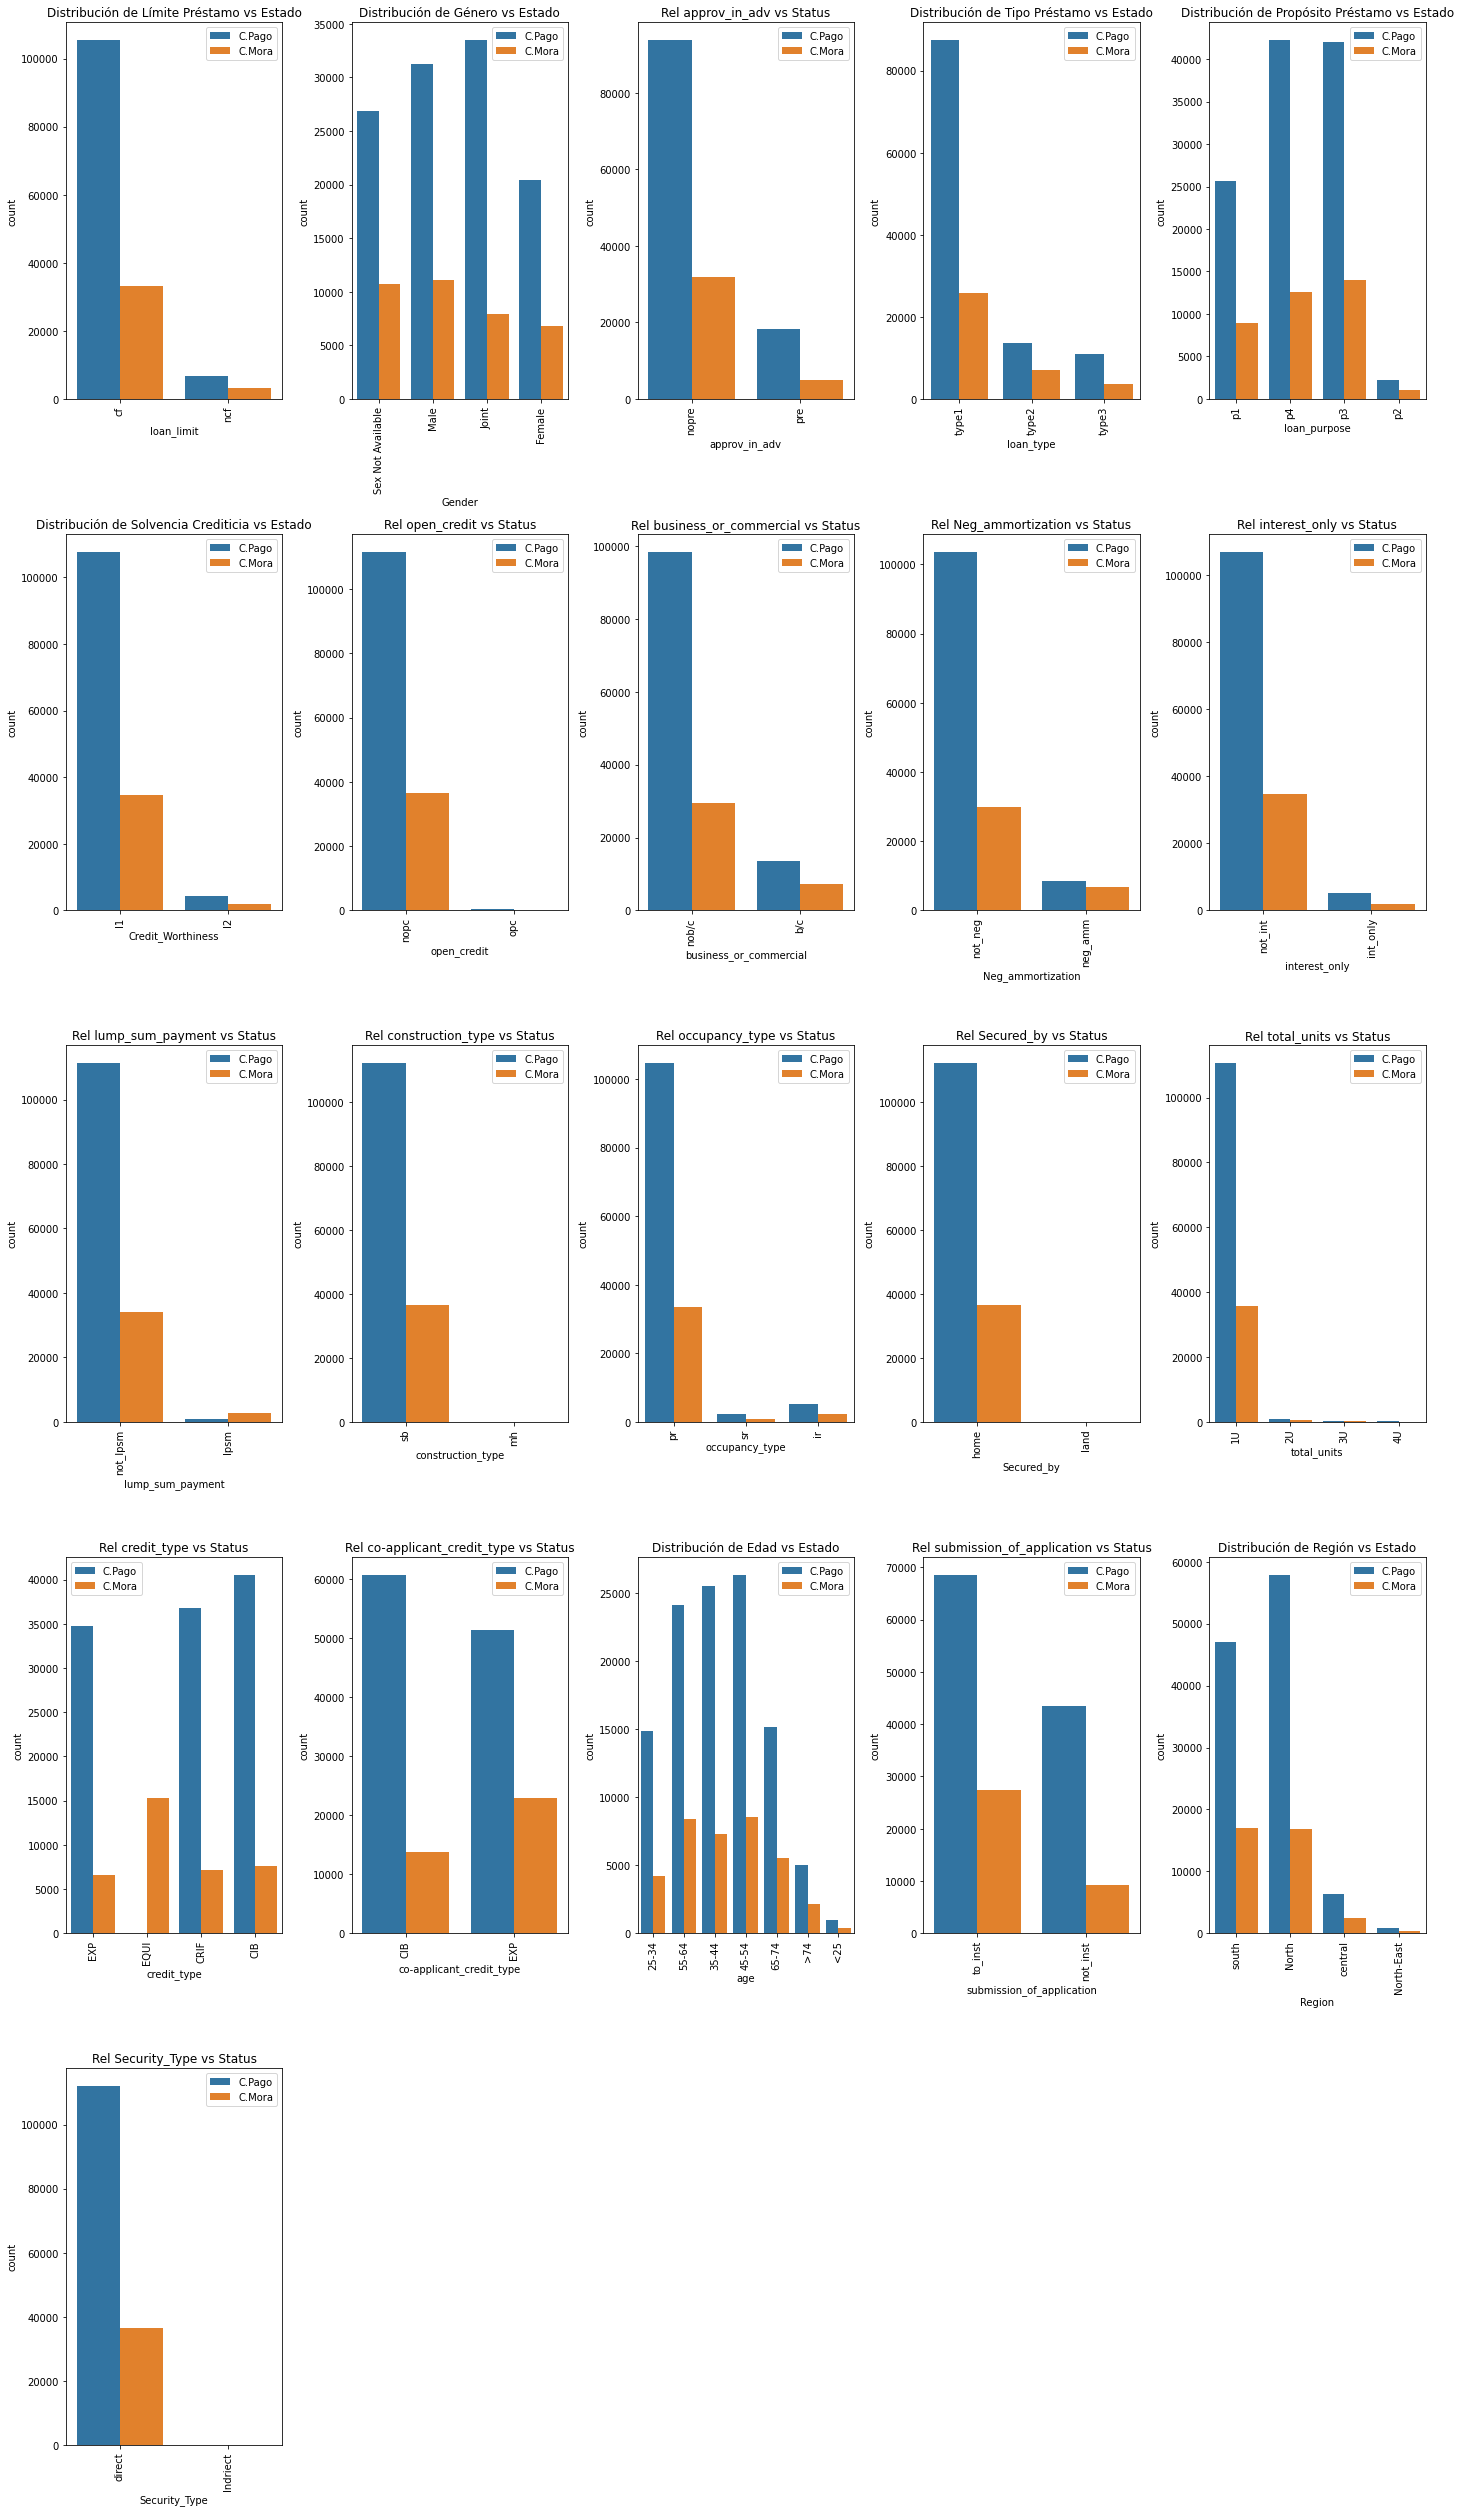

In [86]:
#Plot distributions of categorical features - CONSOLIDATED
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))


# # Plot relationships between categorical features and target variable - CONSOLIDADO. 
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 5, i+1)
    #sns.boxplot(x='Status', y=col, data=datos_limpios)
    sns.countplot(x=col, hue='Status', data=datos_limpios)
    if i == 0:
        plt.title('Distribución de Límite Préstamo vs Estado')
    elif i== 1:
        plt.title('Distribución de Género vs Estado')
    elif i== 3:
        plt.title('Distribución de Tipo Préstamo vs Estado')
    elif i== 4:
        plt.title('Distribución de Propósito Préstamo vs Estado')
    elif i== 5:
        plt.title('Distribución de Solvencia Crediticia vs Estado')
    elif i== 17:
        plt.title('Distribución de Edad vs Estado')
    elif i== 19:
        plt.title('Distribución de Región vs Estado')
    else:
        plt.title(f'Rel {col} vs Status')
    plt.xticks(rotation=90)
    
    plt.tight_layout()

    # Cambiar la leyenda para reflejar los textos descriptivos
    handles, labels = plt.gca().get_legend_handles_labels()
    labels = ['C.Pago' if label == '0' else 'C.Mora' for label in labels]
    plt.legend(handles, labels)

plt.show()


## Tratamiento de valores atípicos o Outliers
Eliminar valores atípicos es una parte importante del preprocesamiento de datos, especialmente en aplicaciones como el credit scoring, donde los valores atípicos pueden distorsionar los resultados del modelo. 

Identificación de Valores Atípicos

#### Métodos Estadísticos
- Rango Intercuartílico (IQR): Los datos se consideran valores atípicos si están por debajo del primer cuartil (Q1) menos 1.5 veces el IQR o por encima del tercer cuartil (Q3) más 1.5 veces el IQR.
Fórmula:
Q1 = datos.quantile(0.25)
Q3 = datos.quantile(0.75)
IQR = Q3 - Q1
- Z-Score: Un valor se considera un valor atípico si su z-score es mayor que 3 o menor que -3.
Fórmula:
datos_sin_outliers = datos[(np.abs(stats.zscore(datos.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

#### Justificación para Eliminar Valores Atípicos
Mejora del Rendimiento del Modelo:
Los valores atípicos pueden sesgar las estimaciones del modelo y reducir su precisión.
Al eliminar valores atípicos, el modelo puede generalizar mejor los datos y mejorar su rendimiento en datos no vistos.

Reducción de la Varianza:
Los valores atípicos pueden aumentar la varianza del modelo, haciéndolo menos robusto.
Eliminar estos valores ayuda a estabilizar las estimaciones y reducir la varianza.

Simplificación del Modelo:
Los valores atípicos pueden complicar el modelo, haciendo que sea más difícil de interpretar y explicar.
Un conjunto de datos más limpio y sin valores atípicos permite construir modelos más simples y comprensibles.

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print(datos_limpios.dtypes)

loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object
submission_of_application     object
L

In [207]:
import pandas as pd
import numpy as np

# Cargar el conjunto de datos limpio
ruta_archivo = '/mnt/data/Loan_Default_Cleaned.csv'
datos = datos_limpios

# Verificar tipos de datos de las columnas
print("Tipos de datos antes de la conversión:")
print(datos.dtypes)

# Listado de columnas que deberían ser numéricas
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir las columnas a numéricas
for columna in columnas_a_convertir:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

# Verificar tipos de datos de las columnas después de la conversión
print("Tipos de datos después de la conversión:")
print(datos.dtypes)

# Eliminar filas con NaN después de la conversión
datos.dropna(subset=columnas_a_convertir, inplace=True)

# Asegurarnos de que todas las columnas numéricas sean realmente numéricas
columnas_numericas = datos.select_dtypes(include=[np.number]).columns
print("Columnas numéricas después de la limpieza:")
print(columnas_numericas)

# Verificar si aún hay columnas con tipo objeto y mostrar valores únicos para inspección
columnas_objeto = datos.select_dtypes(include=[object]).columns
for columna in columnas_objeto:
    print(f"Valores únicos en la columna {columna}:")
    print(datos[columna].unique())

# Identificar valores atípicos usando el método IQR
Q1 = datos[columnas_numericas].quantile(0.25)
Q3 = datos[columnas_numericas].quantile(0.75)
IQR = Q3 - Q1

# Filtrar valores atípicos
datos_sin_outliers = datos[~((datos[columnas_numericas] < (Q1 - 1.5 * IQR)) | (datos[columnas_numericas] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Mostrar la reducción en el número de filas
print("Número de filas antes de eliminar valores atípicos:", datos.shape[0])
print("Número de filas después de eliminar valores atípicos:", datos_sin_outliers.shape[0])

# Guardar el conjunto de datos sin outliers
ruta_archivo_sin_outliers = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers.csv'
datos_sin_outliers.to_csv(ruta_archivo_sin_outliers, index=False)

print("El conjunto de datos limpio sin outliers ha sido guardado en:", ruta_archivo_sin_outliers)


Tipos de datos antes de la conversión:
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object

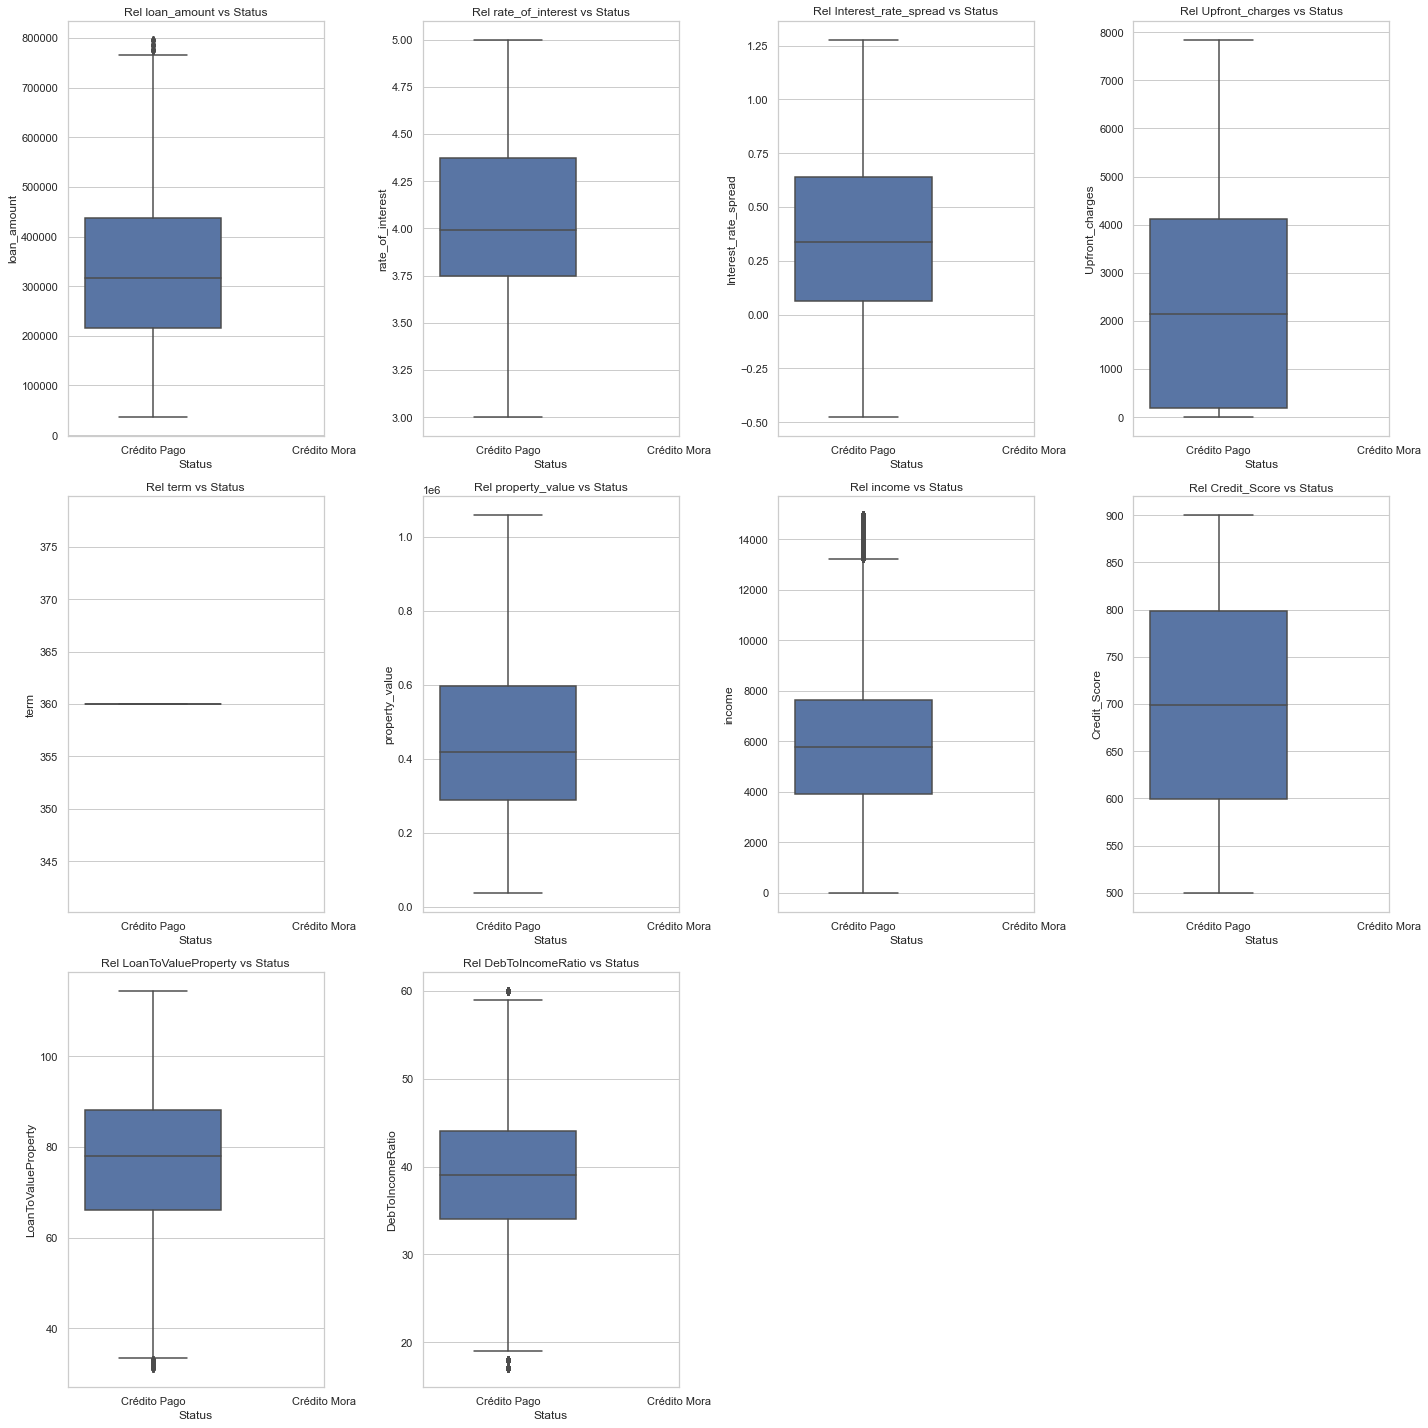

In [212]:
# Split data into features (X) and target (y)
X = datos_limpios.drop('Status', axis=1)
y = datos_limpios['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED SIN OUTLINES. 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Plot relationships between numerical features and target variable - CONSOLIDADO. SIN OUTLINERS
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_sin_outliers)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

Eliminar valores atípicos de manera demasiado agresiva puede llevar a la eliminación de datos críticos para el análisis, como todos los registros con un "status" específico. Esto puede ocurrir si los valores de esas filas se consideran atípicos en varias de las columnas numéricas.

Para abordar este problema, es importante:

- Verificar la distribución de la variable objetivo después de la eliminación de outliers para asegurarse de que no se ha distorsionado significativamente.
- Aplicar técnicas más robustas para la detección de outliers, que no eliminen todos los registros de una categoría crítica.
- Realizar la detección de outliers de manera condicional, es decir, considerar la variable objetivo al decidir qué valores son outliers.

- Al revisar los boxplot se identifican que todos los outliners se eliminan de aquellos registros que están por esta razon es necesario mejorar el tratamiento de los outliers

- Aplicar una técnica más robusta para la detección de outliers (por ejemplo, z-score condicional a la variable objetivo).


 1. Cargar y Preparar los Datos

In [226]:
#Cargar y preparar los datos 
import pandas as pd
import numpy as np

# Cargar el conjunto de datos limpio
#ruta_archivo = '/mnt/data/Loan_Default_Cleaned.csv'
#datos = pd.read_csv(ruta_archivo)
datos = datos_limpios

# Verificar tipos de datos de las columnas
print("Tipos de datos antes de la conversión:")
print(datos.dtypes)

# Listado de columnas que deberían ser numéricas
columnas_a_convertir = ['rate_of_interest', 'Interest_rate_spread', 'Upfront_charges']

# Convertir las columnas a numéricas
for columna in columnas_a_convertir:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

# Eliminar filas con NaN después de la conversión
datos.dropna(subset=columnas_a_convertir, inplace=True)

# Verificar la distribución de la variable objetivo
print("Distribución de la variable objetivo 'Status' antes de eliminar outliers:")
print(datos['Status'].value_counts())


Tipos de datos antes de la conversión:
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
age                           object

2. Aplicar una Técnica Robusta para la Detección de Outliers
Podemos usar el z-score condicional para detectar outliers, asegurándonos de no eliminar todos los registros de una categoría crítica.
A la vez que cuando es muy estricta la eliminación es necesario el ajuste del Umbral del Z-Score y Aplicación de la Eliminación de Outliers
Al ajustar el umbral del z-score a 3.5 para hacer la eliminación de outliers menos estricta y verificar las estadísticas descriptivas antes y después de la eliminación de outliers se concluye que aun así se eliminan la mayoria de los datos. 
Al parecer que hay un problema subyacente en los datos o en la forma en que se está calculando el z-score. Podemos probar un enfoque diferente para eliminar outliers que podría ser más robusto.

Enfoque Alternativo: Usar Percentiles para Identificar Outliers
En lugar de usar z-scores, podemos usar percentiles para identificar y eliminar outliers. Esto es menos sensible a la distribución de los datos y puede ser más efectivo en conjuntos de datos con distribuciones no normales.
Es necesario utilizar la técnica de percentiles, para que el modelo sea menos sensible 

In [228]:
from scipy.stats import zscore

# Asegurarnos de que todas las columnas numéricas sean realmente numéricas
columnas_numericas = datos.select_dtypes(include=[np.number]).columns

# Calcular el z-score condicional por cada grupo de 'Status'
def eliminar_outliers_grupo(df, columnas,umbral=3.5):
    dfs_sin_outliers = []
    for grupo, grupo_df in df.groupby('Status'):
        # Calcular el z-score para cada columna numérica
        z_scores = np.abs(grupo_df[columnas].apply(zscore))
        # Filtrar filas que no son outliers en ninguna columna numérica
        grupo_df_sin_outliers = grupo_df[(z_scores < 3).all(axis=1)]
        dfs_sin_outliers.append(grupo_df_sin_outliers)
    return pd.concat(dfs_sin_outliers)

# Aplicar la función para eliminar outliers condicionales
datos_sin_outliers = eliminar_outliers_grupo(datos, columnas_numericas)

# Verificar la distribución de la variable objetivo después de eliminar outliers
print("Distribución de la variable objetivo 'Status' después de eliminar outliers:")
print(datos_sin_outliers['Status'].value_counts())


# Estadísticas descriptivas antes de eliminar outliers
print("Estadísticas descriptivas antes de eliminar outliers:")
print(datos.describe())

# Estadísticas descriptivas después de eliminar outliers
print("Estadísticas descriptivas después de eliminar outliers:")
print(datos_sin_outliers.describe())

Distribución de la variable objetivo 'Status' después de eliminar outliers:
Series([], Name: count, dtype: int64)
Estadísticas descriptivas antes de eliminar outliers:
        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  1.486700e+05     148670.000000         148670.000000    148670.000000   
mean   3.311177e+05          4.031879              0.429024      3057.397919   
std    1.839093e+05          0.488348              0.445907      2797.972965   
min    1.650000e+04          0.000000             -3.638000         0.000000   
25%    1.965000e+05          3.750000              0.181500      1250.000000   
50%    2.965000e+05          3.990000              0.390400      2596.450000   
75%    4.365000e+05          4.250000              0.620000      3889.495000   
max    3.576500e+06          8.000000              3.357000     60000.000000   

                term  property_value         income   Credit_Score  \
count  148670.000000    1.486700e+05  148

3. Guardar el Dataset Limpio

In [230]:
# Guardar el conjunto de datos sin outliers
ruta_archivo_sin_outliers = path_archivos + '/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
datos_sin_outliers.to_csv(ruta_archivo_sin_outliers, index=False)

print("El conjunto de datos limpio sin outliers ha sido guardado en:", ruta_archivo_sin_outliers)


El conjunto de datos limpio sin outliers ha sido guardado en: C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv


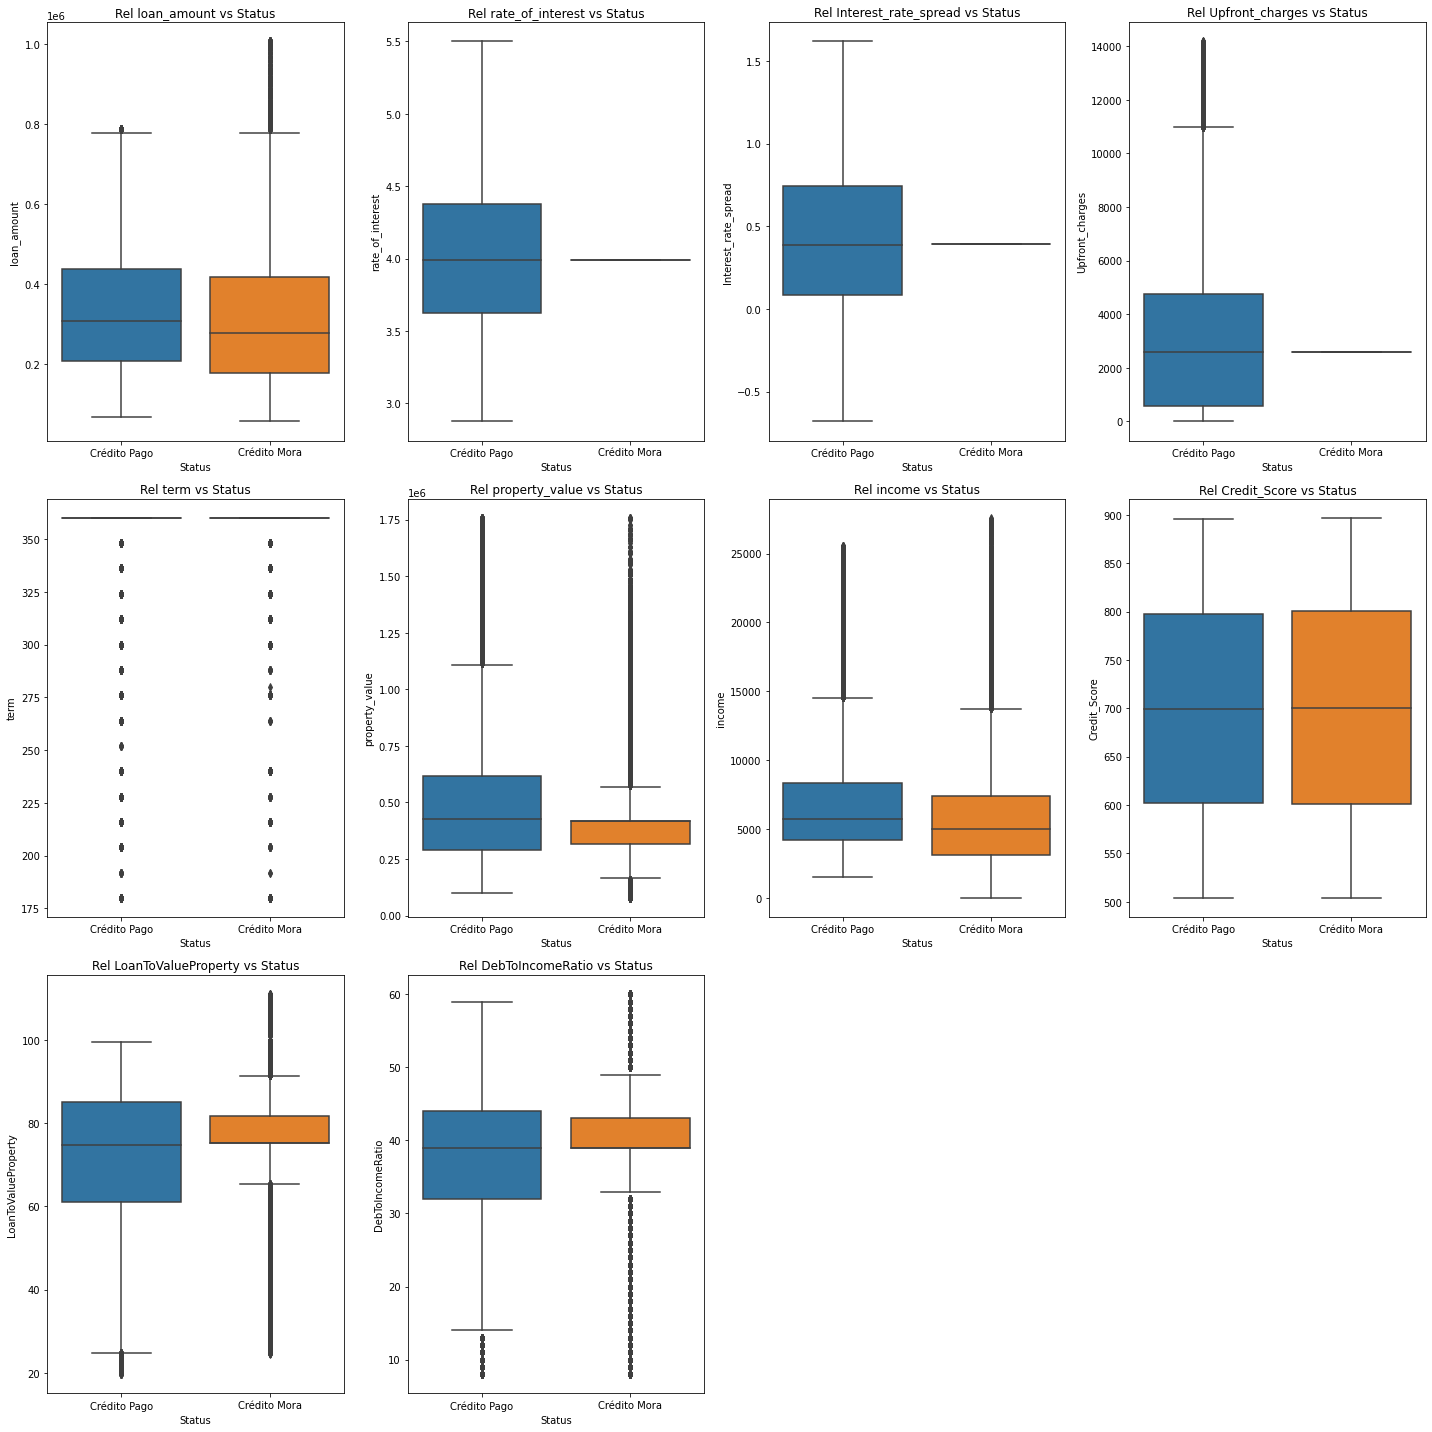

In [3]:
##Leer del archivo 
#Cargar y preparar los datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats


# Cargar el conjunto de datos limpio
ruta_archivo = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
datos_sin_outliers = pd.read_csv(ruta_archivo)

# Split data into features (X) and target (y)
X = datos_sin_outliers.drop('Status', axis=1)
y = datos_sin_outliers['Status'].astype(int)

# Combine X and y for visualization
data = X.copy()
data['Status'] = y

# Plot distributions of numerical features in a consolidated plot - CONSOLIDATED SIN OUTLINES. 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Plot relationships between numerical features and target variable - CONSOLIDADO. SIN OUTLINERS
# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

# Plot relationships between numerical features and the target variable 'Status'

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='Status', y=col, data=datos_sin_outliers)
    plt.title(f'Rel {col} vs Status')
    plt.xticks([0, 1], ['Crédito Pago', 'Crédito Mora'])
    plt.tight_layout()

plt.show()

### Matriz de correlación de todas las variables

#### De todas las variables

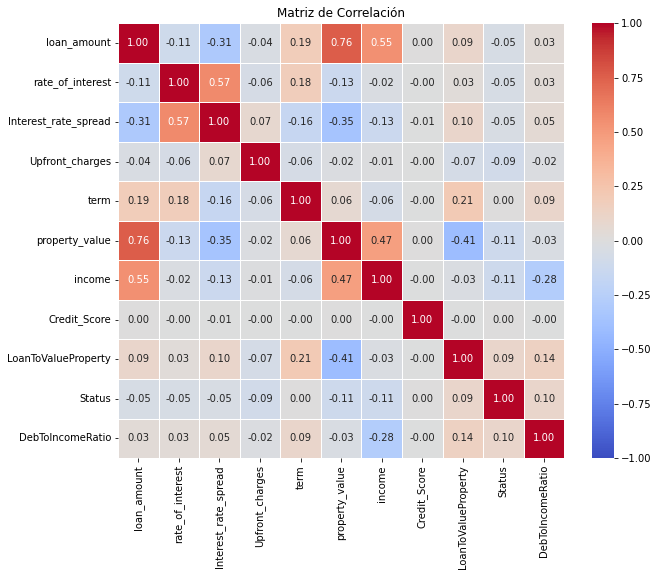

In [2]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
# Seleccionar columnas numéricas
columnas_numericas = datos_sin_outliers.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
# Calcular la matriz de correlación
corr_matrix = columnas_numericas.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


#### Matriz con la variables Objetivo

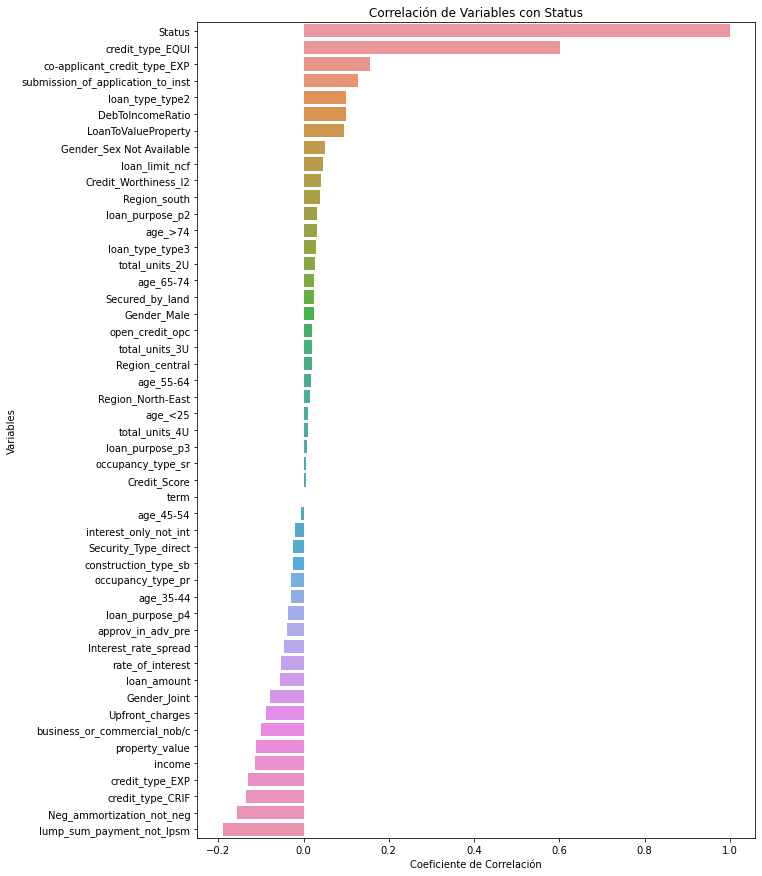

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos nuevamente
# Cargar el conjunto de datos limpio
ruta_archivo = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
datos_sin_outliers = pd.read_csv(ruta_archivo)

# Codificación de variables categóricas
data_encoded = pd.get_dummies(datos_sin_outliers, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Extraer la correlación de todas las variables con la variable objetivo 'Status'
correlation_with_target = correlation_matrix['Status'].sort_values(ascending=False)

# Crear un gráfico de barras para visualizar la correlación de las variables con la variable objetivo 'Status'
plt.figure(figsize=(10, 15))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Correlación de Variables con Status')
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Variables')
plt.show()



### Variables con Correlación Positiva  más Alta

- credit_type_EQUI (0.602224):
Esta variable tiene la correlación positiva más alta con Status. Esto significa que los préstamos asociados con el tipo de crédito EQUI tienen una mayor probabilidad de estar en default.
- co-applicant_credit_type_EXP (0.155227):
Esta variable muestra que si el co-aplicante tiene un tipo de crédito EXP, hay una probabilidad mayor de default. La correlación es significativa pero mucho menor que la de credit_type_EQUI.
- submission_of_application_to_inst (0.128460):
La presentación de la solicitud a una institución (to_inst) también está positivamente correlacionada con la probabilidad de default, aunque de manera moderada.

### Variables con Correlación Negativa más Alta

- lump_sum_payment_not_lpsm (-0.189551):
Esta variable tiene la correlación negativa más alta con Status, indicando que los préstamos que no tienen un pago único (lump sum) están menos propensos a estar en default.
- Neg_ammortization_not_neg (-0.155048):
Los préstamos sin amortización negativa (not_neg) tienen menos probabilidad de estar en default, lo que sugiere que los términos de amortización son un factor importante en la estabilidad del préstamo.
- credit_type_CRIF (-0.134012):
Los préstamos asociados con el tipo de crédito CRIF tienen menos probabilidad de estar en default, lo que contrasta con la alta correlación positiva observada con credit_type_EQUI.

#### Resumen
DebToIncomeRatio (0.098567): El ratio de deuda a ingresos muestra una correlación positiva con el default, indicando que los prestatarios con una mayor proporción de deuda en relación con sus ingresos tienen más probabilidad de incumplir.

LoanToValueProperty (0.094923): El ratio préstamo-valor de la propiedad también muestra una correlación positiva, sugiriendo que a mayor ratio, mayor es el riesgo de default.

Credit_Score (0.004910): El puntaje de crédito tiene una correlación muy baja y positiva con el default, lo que puede ser contraintuitivo. Esto podría indicar la necesidad de revisar cómo se está utilizando el puntaje de crédito en el modelo o la calidad de los datos.

#### Conclusión
Las variables credit_type_EQUI, co-applicant_credit_type_EXP, y submission_of_application_to_inst son las que más influyen en la probabilidad de default de un préstamo, con correlaciones positivas significativas. Por otro lado, lump_sum_payment_not_lpsm, Neg_ammortization_not_neg, y credit_type_CRIF tienen correlaciones negativas significativas, indicando una menor probabilidad de default.

### Modelado de datos

Para proceder con la regresión logística, realizaremos los siguientes pasos:

- Codificar las variables categóricas: Convertir las variables categóricas en variables numéricas utilizando la codificación one-hot.
- Dividir los datos: Separar los datos en conjuntos de entrenamiento y prueba.
- Ajustar el modelo de regresión logística: Entrenar el modelo con los datos de entrenamiento.
- Evaluar el modelo: Analizar el rendimiento del modelo utilizando el conjunto de prueba y métricas de evaluación como la matriz de confusión, precisión, recall y AUC-ROC.

In [39]:
#Codificación de las variables categóricas

# Mostrar las primeras filas del dataframe para explorar su contenido
datos_sin_outliers.head(), datos_sin_outliers.info(), datos_sin_outliers.describe()

from sklearn.preprocessing import OneHotEncoder


# Seleccionar las variables predictoras y la variable objetivo
X = datos_sin_outliers.drop('Status', axis=1)
y = datos_sin_outliers['Status']

# Identificar las columnas categóricas
categorical_cols = X.select_dtypes(include=['object']).columns

# Codificar las variables categóricas usando OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Añadir las variables numéricas al dataframe codificado
numeric_cols = X.select_dtypes(exclude=['object']).columns
X_encoded[numeric_cols] = X[numeric_cols].reset_index(drop=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Mostrar la forma de los conjuntos de datos resultantes
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130654 entries, 0 to 130653
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 130654 non-null  object 
 1   Gender                     130654 non-null  object 
 2   approv_in_adv              130654 non-null  object 
 3   loan_type                  130654 non-null  object 
 4   loan_purpose               130654 non-null  object 
 5   Credit_Worthiness          130654 non-null  object 
 6   open_credit                130654 non-null  object 
 7   business_or_commercial     130654 non-null  object 
 8   loan_amount                130654 non-null  int64  
 9   rate_of_interest           130654 non-null  float64
 10  Interest_rate_spread       130654 non-null  float64
 11  Upfront_charges            130654 non-null  float64
 12  term                       130654 non-null  float64
 13  Neg_ammortization          13

c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Forma de X_train: (91457, 48)
Forma de X_test: (39197, 48)
Forma de y_train: (91457,)
Forma de y_test: (39197,)


Hemos codificado las variables categóricas y dividido los datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento tiene 91,457 registros y 48 columnas, mientras que el conjunto de prueba tiene 39,197 registros y las mismas 48 columnas.

Codificación de Variables Categóricas: Se utiliza OneHotEncoder para convertir las variables categóricas en variables dummy (0 o 1). Esto es necesario porque los modelos de aprendizaje automático no pueden trabajar directamente con variables categóricas.

Interpretación de los Datos Resultantes
Forma de X_train y X_test:

X_train tiene 91,457 registros y 48 columnas.
X_test tiene 39,197 registros y 48 columnas.
Cada columna en X_train y X_test representa una variable predictora. Las 48 columnas incluyen tanto las variables numéricas originales como las variables categóricas codificadas.
Forma de y_train y y_test:

y_train y y_test contienen la variable objetivo para los conjuntos de entrenamiento y prueba, respectivamente.
y_train tiene 91,457 valores y y_test tiene 39,197 valores, cada uno correspondiente a un registro en X_train y X_test.

Comentarios

- Codificación One-Hot: La codificación de variables categóricas es crucial para que los modelos de aprendizaje automático puedan utilizar esta información. Cada categoría única de una variable categórica se convierte en una columna separada con valores binarios (0 o 1).

- Balance de Clases: Al entrenar un modelo de regresión logística, es importante considerar el balance de clases en la variable objetivo. Si una clase está subrepresentada (como en este caso, los préstamos en mora), puede ser necesario utilizar técnicas de sobremuestreo, submuestreo o ajuste de los pesos de las clases para mejorar el rendimiento del modelo.

- División de Datos: La división en conjuntos de entrenamiento y prueba permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, proporcionando una medida más realista de su desempeño.



In [40]:
datos_sin_outliers.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LoanToValueProperty,Region,Security_Type,Status,DebToIncomeRatio
0,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
1,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
2,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
3,cf,Joint,pre,type1,p1,l1,nopc,nob/c,706500,3.99,...,EXP,864,EXP,35-44,not_inst,70.089286,North,direct,0,40.0
4,cf,Joint,pre,type1,p3,l1,nopc,nob/c,346500,4.50,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0


c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Resultados de regresión logística Modelo Base

              precision    recall  f1-score   support

           0       0.85      0.99      0.92     19533
           1       0.95      0.49      0.64      6598

    accuracy                           0.86     26131
   macro avg       0.90      0.74      0.78     26131
weighted avg       0.88      0.86      0.85     26131



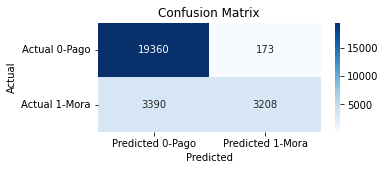

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data=datos_sin_outliers

# Separar características y variable objetivo
X = data.drop('Status', axis=1)
y = data['Status']

# Identificar variables categóricas y numéricas
categorical_features = ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 
                        'Credit_Worthiness', 'open_credit', 'business_or_commercial', 
                        'credit_type', 'co-applicant_credit_type', 'submission_of_application', 
                        'Region', 'Security_Type', 'age']

numerical_features = ['loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 
                      'term', 'property_value', 'income', 'Credit_Score', 
                      'LoanToValueProperty', 'DebToIncomeRatio']

# Aplicar OneHotEncoder a variables categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_features])

# Normalizar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_features])

# Unir variables transformadas
import numpy as np

X_preprocessed = np.hstack((X_encoded, X_scaled))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = log_reg.predict(X_test)

# Evaluar el modelo
report = classification_report(y_test, y_pred)
print ("Resultados de regresión logística Modelo Base\n")
print (report)

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
class_report_log_base = classification_report(y_test, y_pred, output_dict=True)


# Visualizar la matriz de confusión
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0-Pago', 'Predicted 1-Mora'], yticklabels=['Actual 0-Pago', 'Actual 1-Mora'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Interpretación de los resultados
El modelo tiene un buen rendimiento en la predicción de la clase mayoritaria (0) con un F1-Score de 0.92.
El rendimiento para la clase minoritaria (1) es más bajo, con un F1-Score de 0.64, lo que indica que el modelo tiene dificultades para predecir correctamente las instancias de esta clase.
La exactitud global del modelo es alta (0.86), pero dado el desbalance en las clases, es importante considerar otras métricas como el recall y el F1-Score para evaluar el rendimiento del modelo en la clase minoritaria.

El modelo tiene un buen rendimiento en la predicción de la clase mayoritaria (0) con un F1-Score de 0.92.
El rendimiento para la clase minoritaria (1) es más bajo, con un F1-Score de 0.64, lo que indica que el modelo tiene dificultades para predecir correctamente las instancias de esta clase.
La exactitud global del modelo es alta (0.86), pero dado el desbalance en las clases, es importante considerar otras métricas como el recall y el F1-Score para evaluar el rendimiento del modelo en la clase minoritaria.
Así, el recall (también conocido como sensibilidad o tasa de verdaderos positivos) mide la proporción de verdaderos positivos que son correctamente identificados por el modelo. Es decir, de todas las instancias que realmente pertenecen a la clase positiva.
Recall=(True Positives)/(True Positives+False Negatives)
Recall para la clase 1 (minoritaria): 0.49
Esto significa que el modelo solo está identificando correctamente el 49% de las instancias de la clase minoritaria. El 51% restante son falsos negativos (instancias que el modelo predijo incorrectamente como clase 0).
Así, el F1-Score es la media armónica entre la precisión y el recall, proporcionando una única métrica que balancea ambos aspectos. Es especialmente útil cuando se necesita un balance entre la precisión (qué tan correcto es el modelo cuando predice la clase positiva) y el recall (qué tan bien el modelo captura la clase positiva).
F1-Score=2*((Precision*Recall)/(Precision +Recall ))
F1-score para la clase 1 (minoritaria): 0.64
El F1-score más bajo para la clase minoritaria refleja que, aunque el modelo puede tener una precisión razonable (95%), no está capturando suficientes instancias de la clase positiva (recall bajo), lo que reduce el F1-score.

Para mejorar el rendimiento en la clase minoritaria se puede:
	Aplicar técnicas de balance de clases como sobremuestreo de la clase minoritaria o submuestreo de la clase mayoritaria)
	Ajustar los umbrales de decisión del modelo
	Utilizar técnicas de modelado as avanzadas como ensambes ( eg. Random forest, Gradient Boosting).  (J. Monroy-de-Jesús, A. Guadalupe-Ramírez, J.C. Ambriz-Polo, E. López-González, 2018)



### Implementar SMOTE

Resultados de regresión logística - SMOTE

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     19533
           1       0.64      0.70      0.67      6598

    accuracy                           0.83     26131
   macro avg       0.77      0.78      0.77     26131
weighted avg       0.83      0.83      0.83     26131



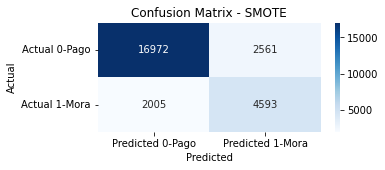

In [42]:
from imblearn.over_sampling import SMOTE

# Aplicar SMOTE al conjunto de datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entrenar nuevamente el modelo de regresión logística con los datos balanceados
log_reg_resampled = LogisticRegression(max_iter=1000)  # Aumentar el número de iteraciones
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones con el modelo balanceado
y_pred_resampled = log_reg_resampled.predict(X_test)
y_pred_log_smote = log_reg_resampled.predict(X_test)

# Evaluar el modelo balanceado
report_resampled = classification_report(y_test, y_pred_resampled)

# Generar matriz de confusión del modelo balanceado
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
conf_matrix_resampled_df = pd.DataFrame(conf_matrix_resampled, index=['Actual 0-Pago', 'Actual 1-Mora'], columns=['Predicted 0-Pago', 'Predicted 1-Mora'])
class_report_log_smote = classification_report(y_test, y_pred_log_smote, output_dict=True)

print ("Resultados de regresión logística - SMOTE\n")
print (report_resampled)

# Visualizar la matriz de confusión de smote
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0-Pago', 'Predicted 1-Mora'], yticklabels=['Actual 0-Pago', 'Actual 1-Mora'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SMOTE')
plt.show()



El recall de la clase minoritaria (1) ha aumentado significativamente de 0.49 a 0.70, lo que indica que el modelo ahora está capturando más instancias positivas.
La precisión de la clase minoritaria ha disminuido de 0.95 a 0.64, lo que refleja un incremento en los falsos positivos.
El F1-score de la clase minoritaria ha mejorado de 0.64 a 0.67, lo que muestra un mejor balance entre precisión y recall.
La exactitud global del modelo es ligeramente menor (0.83) comparada con el modelo no balanceado (0.86), lo que es un resultado esperado debido al enfoque en mejorar la detección de la clase minoritaria.
El balanceo de clases con SMOTE ha mejorado significativamente la capacidad del modelo para detectar instancias de la clase minoritaria, a expensas de una ligera disminución en la precisión y exactitud global. Este es un compromiso común en problemas de desbalance de clases, donde mejorar el recall de la clase minoritaria puede ser más importante que mantener una precisión global alta.


### Evaluación con Random Forest

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Configurar validación cruzada con 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir el modelo de regresión logística
log_reg_cv = LogisticRegression(max_iter=1000)

# Aplicar SMOTE y validar el modelo en cada fold
scores = cross_val_score(log_reg_cv, X_preprocessed, y, cv=cv, scoring='f1')

# Promediar los resultados
mean_f1_score = scores.mean()
std_f1_score = scores.std()
print (" Evaluación Modelo Random fores con validación Cruzada\n")
print("F1-Score promedio: ",mean_f1_score)
print ("Desviación Standard del F1-Score:", std_f1_score)



 Evaluación Modelo Random fores con validación Cruzada

F1-Score promedio:  0.637920852179077
Desviación Standard del F1-Score: 0.0038805076938629862


El F1-score promedio de 0.63 indica que, en general, el modelo tiene un rendimiento moderado en términos de balance entre precisión y recall. El F1-score se calcula como la media armónica de la precisión y el recall, por lo que este valor sugiere:

Moderada Precisión: El modelo tiene una tasa razonable de predicciones correctas para la clase positiva.
Moderado Recall: El modelo también es razonablemente capaz de identificar las instancias positivas.
Un F1-score de 0.63 puede considerarse adecuado en contextos donde se espera un rendimiento balanceado entre detectar verdaderos positivos y minimizar falsos positivos y negativos. Sin embargo, hay margen para mejorar.
Mientras que, la desviación Estándar del F1-Score de 0.003 es extremadamente baja, lo que indica que el rendimiento del modelo es muy consistente entre las diferentes particiones (folds) del conjunto de datos en la validación cruzada.  El modelo proporciona resultados similares en cada fold, por ende el modelo es robusto y no esta sobreajustado. 
Se puede tener confianza en que el rendimiento promedio del modelo (F1-score de 0.63) es representativo y no fluctúa significativamente dependiendo de cómo se divida el conjunto de datos.


Resultados de Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19533
           1       1.00      1.00      1.00      6598

    accuracy                           1.00     26131
   macro avg       1.00      1.00      1.00     26131
weighted avg       1.00      1.00      1.00     26131



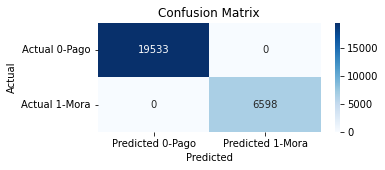

In [43]:
# Entrenar el modelo de Random Forest
rf_model_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_base.fit(X_train, y_train)
y_pred_rf_base = rf_model_base.predict(X_test)

# Generar métricas
class_report_rf_base = classification_report(y_test, y_pred_rf_base, output_dict=True)
conf_matrix_rf_base = confusion_matrix(y_test, y_pred_rf_base)


# Evaluar el modelo
report = classification_report(y_test, y_pred_rf_base)
print ("Resultados de Random Forest\n")
print (report)

# Generar matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_rf_base)
class_report_rf_base = classification_report(y_test, y_pred_rf_base, output_dict=True)


# Visualizar la matriz de confusión
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0-Pago', 'Predicted 1-Mora'], yticklabels=['Actual 0-Pago', 'Actual 1-Mora'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Optimización modelo Random Forest

Para optimizar el modelo de Random Forest, vamos a realizar una búsqueda de hiperparámetros utilizando GridSearchCV. Este proceso permitirá encontrar la mejor combinación de hiperparámetros para mejorar el rendimiento del modelo.

In [21]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores para los hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Aplicar SMOTE al conjunto de datos completo
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search.fit(X_resampled, y_resampled)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Resultado de Optimizacion de RandomForest")

best_params, best_score


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Proceso manual, por falta de recursos hay que hacerlo por partes. 

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import StratifiedKFold

# Configurar validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definir los hiperparámetros a evaluar
param_grid_manual = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Crear una función para evaluar el rendimiento del modelo con diferentes hiperparámetros
def evaluate_random_forest(params):
    rf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42
    )
    
    f1_scores = []
    for train_index, test_index in cv.split(X_preprocessed, y):
        X_train_fold, X_test_fold = X_preprocessed[train_index], X_preprocessed[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]
        
        X_train_fold_resampled, y_train_fold_resampled = smote.fit_resample(X_train_fold, y_train_fold)
        
        rf.fit(X_train_fold_resampled, y_train_fold_resampled)
        y_pred_fold = rf.predict(X_test_fold)
        
        f1 = f1_score(y_test_fold, y_pred_fold)
        f1_scores.append(f1)
    
    return np.mean(f1_scores), np.std(f1_scores)

# Evaluar diferentes combinaciones de hiperparámetros
results = []
for n_estimators in param_grid_manual['n_estimators']:
    for max_depth in param_grid_manual['max_depth']:
        for min_samples_split in param_grid_manual['min_samples_split']:
            for min_samples_leaf in param_grid_manual['min_samples_leaf']:
                for max_features in param_grid_manual['max_features']:
                    params = {
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'min_samples_split': min_samples_split,
                        'min_samples_leaf': min_samples_leaf,
                        'max_features': max_features
                    }
                    mean_f1, std_f1 = evaluate_random_forest(params)
                    results.append((params, mean_f1, std_f1))

# Ordenar los resultados por el F1-score promedio
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)
results_sorted


KeyboardInterrupt: 

In [12]:
from sklearn.ensemble import RandomForestClassifier

optimized_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Train the optimized model
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)
optimized_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

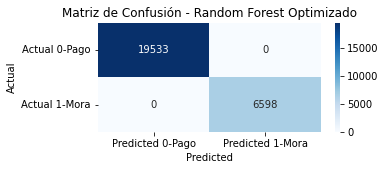

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar el modelo Random Forest optimizado con los mejores hiperparámetros
optimized_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Aplicar SMote al conjunto de datos completo
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Entrenar el modelo optimizado
optimized_rf.fit(X_resampled, y_resampled)

# Dividir el conjunto de datos original en entrenamiento y prueba para evaluar la matriz de confusión
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Realizar predicciones en el conjunto de prueba
#y_pred_optimized_rf = optimized_rf.predict(X_test)
y_pred_rf_optimized = optimized_rf.predict(X_test)


# Generar la matriz de confusión
conf_matrix_optimized_rf = confusion_matrix(y_test, y_pred_rf_optimized)
class_report_rf_optimized = classification_report(y_test, y_pred_rf_optimized, output_dict=True)

# Visualizar la matriz de confusión
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix_optimized_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0-Pago', 'Predicted 1-Mora'], yticklabels=['Actual 0-Pago', 'Actual 1-Mora'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.show()


#### Anexos

c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


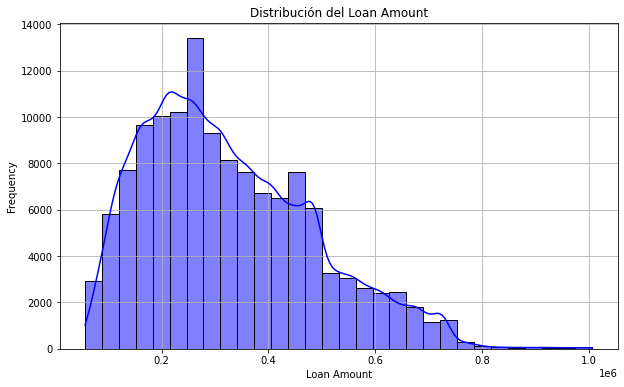

In [17]:
# Visualizar la distribución del 'loan_amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amount'], kde=True, bins=30, color='blue')
plt.title('Distribución del Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [20]:
# Calcular estadísticas descriptivas detalladas para la columna 'loan_amount'
loan_amount_stats = data['loan_amount'].describe()

# Adicionalmente, calcular la mediana y los cuartiles
loan_amount_stats['median'] = data['loan_amount'].median()
loan_amount_stats['Q1'] = data['loan_amount'].quantile(0.25)
loan_amount_stats['Q3'] = data['loan_amount'].quantile(0.75)
loan_amount_stats['IQR'] = loan_amount_stats['Q3'] - loan_amount_stats['Q1']


# Convertir las estadísticas a float y formatearlas para no tener valores exponenciales
loan_amount_stats = loan_amount_stats.apply(float).apply(lambda x: format(x, 'f'))

loan_amount_stats


count      130654.000000
mean       326250.868707
std        159717.241106
min         56500.000000
25%        206500.000000
50%        296500.000000
75%        426500.000000
max       1006500.000000
median     296500.000000
Q1         206500.000000
Q3         426500.000000
IQR        220000.000000
Name: loan_amount, dtype: object

c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


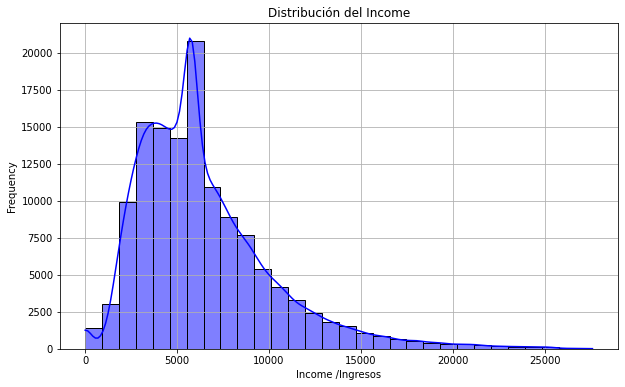

count     130654.000000
mean        6469.415709
std         3751.078147
min            0.000000
25%         3900.000000
50%         5760.000000
75%         8100.000000
max        27600.000000
median      5760.000000
Q1          3900.000000
Q3          8100.000000
IQR         4200.000000
Name: income, dtype: object

In [22]:
# Visualizar la distribución del 'income'
plt.figure(figsize=(10, 6))
sns.histplot(data['income'], kde=True, bins=30, color='blue')
plt.title('Distribución del Income')
plt.xlabel('Income /Ingresos')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



# Calcular estadísticas descriptivas detalladas para la columna 'income'
loan_amount_stats = data['income'].describe()

# Adicionalmente, calcular la mediana y los cuartiles
loan_amount_stats['median'] = data['income'].median()
loan_amount_stats['Q1'] = data['income'].quantile(0.25)
loan_amount_stats['Q3'] = data['income'].quantile(0.75)
loan_amount_stats['IQR'] = loan_amount_stats['Q3'] - loan_amount_stats['Q1']

# Convertir las estadísticas a float y formatearlas para no tener valores exponenciales
loan_amount_stats = loan_amount_stats.apply(float).apply(lambda x: format(x, 'f'))

loan_amount_stats


### Comparación entre modelos de predicción 

- REgresion Logistica
- Regresio logistica con SMOTE
- Random Forest
- RAndom Forest optimizado

In [10]:
##Leer del archivo 
#Cargar y preparar los datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos nuevamente
# Cargar el conjunto de datos limpio
ruta_archivo = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
data = pd.read_csv(ruta_archivo)


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# Cargar los datos nuevamente
# Cargar el conjunto de datos limpio
ruta_archivo = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
data = pd.read_csv(ruta_archivo)

# Convertir las columnas categóricas a numéricas usando one-hot encoding
data_encoded = pd.get_dummies(data.drop(columns=['Status']))
X = data_encoded
y = data['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Entrenar el modelo de Regresión Logística base
log_reg_base = LogisticRegression(max_iter=1000, random_state=42)
log_reg_base.fit(X_train, y_train)
y_pred_log_base = log_reg_base.predict(X_test)

# Generar métricas
class_report_log_base = classification_report(y_test, y_pred_log_base, output_dict=True)
conf_matrix_log_base = confusion_matrix(y_test, y_pred_log_base)


In [22]:
# Combinar X_train e y_train para balancear manualmente
train_data = pd.concat([X_train, y_train], axis=1)

# Separar las clases mayoritaria y minoritaria
majority_class = train_data[train_data.Status == 0]
minority_class = train_data[train_data.Status == 1]

# Sobremuestrear la clase minoritaria
minority_upsampled = resample(minority_class,
                              replace=True, # Sobremuestrear con reemplazo
                              n_samples=len(majority_class), # Igualar a la clase mayoritaria
                              random_state=42)

# Combinar clases mayoritaria y sobremuestreada
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Separar X e y del conjunto balanceado
X_train_balanced = upsampled_data.drop('Status', axis=1)
y_train_balanced = upsampled_data['Status']

# Entrenar el modelo de Regresión Logística
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_train_balanced, y_train_balanced)
y_pred_log_smote = log_reg_smote.predict(X_test)

# Generar métricas
class_report_log_smote = classification_report(y_test, y_pred_log_smote, output_dict=True)
conf_matrix_log_smote = confusion_matrix(y_test, y_pred_log_smote)

In [23]:
# Entrenar el modelo de Random Forest
rf_model_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_base.fit(X_train, y_train)
y_pred_rf_base = rf_model_base.predict(X_test)

# Generar métricas
class_report_rf_base = classification_report(y_test, y_pred_rf_base, output_dict=True)
conf_matrix_rf_base = confusion_matrix(y_test, y_pred_rf_base)

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Cargar el conjunto de datos limpio
ruta_archivo = 'C:/Users/pachecsa/OneDrive - Universidad de Las Américas/Proyecto/LoanDefault/Loan_Default_Cleaned_Sin_Outliers_Condicional.csv'
df = pd.read_csv(ruta_archivo)

# Verificar si hay columnas con valores no numéricos y convertirlas
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            df[column] = pd.to_numeric(df[column])
        except ValueError:
            # Si la conversión falla, puede ser una columna categórica
            df = pd.get_dummies(df, columns=[column])

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Status'])
y = df['Status']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir el modelo de Random Forest
rf_model_optimized = RandomForestClassifier(random_state=42)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators':  [200],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Configurar el Randomized Search
random_search = RandomizedSearchCV(estimator=rf_model_optimized, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42, scoring='f1')

# Ejecutar la búsqueda aleatoria
random_search.fit(X_train, y_train)

# Mejor modelo
best_rf_model = random_search.best_estimator_
y_pred_rf_optimized = best_rf_model.predict(X_test)

# Generar métricas
class_report_rf_optimized = classification_report(y_test, y_pred_rf_optimized, output_dict=True)
conf_matrix_rf_optimized = confusion_matrix(y_test, y_pred_rf_optimized)

# Mostrar el reporte de clasificación
print("Reporte de Clasificación del Modelo Optimizado:")
print(pd.DataFrame(class_report_rf_optimized).transpose())

# Mostrar la matriz de confusión
print("Matriz de Confusión del Modelo Optimizado:")
print(conf_matrix_rf_optimized)

c:\Users\pachecsa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Reporte de Clasificación del Modelo Optimizado:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0  19472.0
1                   1.0     1.0       1.0   6659.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  26131.0
weighted avg        1.0     1.0       1.0  26131.0
Matriz de Confusión del Modelo Optimizado:
[[19472     0]
 [    0  6659]]


In [45]:

# Crear un DataFrame con los resultados de cada modelo
results = {
    'Model': ['Logistic Regression Base', 'Logistic Regression SMOTE', 'Random Forest', 'Random Forest Optimized'],
    'Accuracy': [
        class_report_log_base['accuracy'],
        class_report_log_smote['accuracy'],
        class_report_rf_base['accuracy'],
        class_report_rf_optimized['accuracy']
    ],
    'Precision (Class 0)': [
        class_report_log_base['0']['precision'],
        class_report_log_smote['0']['precision'],
        class_report_rf_base['0']['precision'],
        class_report_rf_optimized['0']['precision']
    ],
    'Recall (Class 0)': [
        class_report_log_base['0']['recall'],
        class_report_log_smote['0']['recall'],
        class_report_rf_base['0']['recall'],
        class_report_rf_optimized['0']['recall']
    ],
    'F1-Score (Class 0)': [
        class_report_log_base['0']['f1-score'],
        class_report_log_smote['0']['f1-score'],
        class_report_rf_base['0']['f1-score'],
        class_report_rf_optimized['0']['f1-score']
    ],
    'Precision (Class 1)': [
        class_report_log_base['1']['precision'],
        class_report_log_smote['1']['precision'],
        class_report_rf_base['1']['precision'],
        class_report_rf_optimized['1']['precision']
    ],
    'Recall (Class 1)': [
        class_report_log_base['1']['recall'],
        class_report_log_smote['1']['recall'],
        class_report_rf_base['1']['recall'],
        class_report_rf_optimized['1']['recall']
    ],
    'F1-Score (Class 1)': [
        class_report_log_base['1']['f1-score'],
        class_report_log_smote['1']['f1-score'],
        class_report_rf_base['1']['f1-score'],
        class_report_rf_optimized['1']['f1-score']
    ],
    'Macro Avg Precision': [
        class_report_log_base['macro avg']['precision'],
        class_report_log_smote['macro avg']['precision'],
        class_report_rf_base['macro avg']['precision'],
        class_report_rf_optimized['macro avg']['precision']
    ],
    'Macro Avg Recall': [
        class_report_log_base['macro avg']['recall'],
        class_report_log_smote['macro avg']['recall'],
        class_report_rf_base['macro avg']['recall'],
        class_report_rf_optimized['macro avg']['recall']
    ],
    'Macro Avg F1-Score': [
        class_report_log_base['macro avg']['f1-score'],
        class_report_log_smote['macro avg']['f1-score'],
        class_report_rf_base['macro avg']['f1-score'],
        class_report_rf_optimized['macro avg']['f1-score']
    ]
}

results_df = pd.DataFrame(results)

# Mostrar el DataFrame final y los mejores parámetros
print(results_df)
print("\nMejores parámetros encontrados por Randomized Search:")
print(best_params)


                       Model  Accuracy  Precision (Class 0)  Recall (Class 0)  \
0   Logistic Regression Base  0.863649             0.850989          0.991143   
1  Logistic Regression SMOTE  0.825265             0.894346          0.868889   
2              Random Forest  1.000000             1.000000          1.000000   
3    Random Forest Optimized  1.000000             1.000000          1.000000   

   F1-Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.915734             0.948832          0.486208   
1            0.881433             0.642018          0.696120   
2            1.000000             1.000000          1.000000   
3            1.000000             1.000000          1.000000   

   F1-Score (Class 1)  Macro Avg Precision  Macro Avg Recall  \
0            0.642950             0.899910          0.738676   
1            0.667976             0.768182          0.782504   
2            1.000000             1.000000          1.000000   
3            1.00

+----+---------------------------+------------+-----------------------+--------------------+----------------------+-----------------------+--------------------+----------------------+-----------------------+--------------------+----------------------+
|    | Model                     |   Accuracy |   Precision (Class 0) |   Recall (Class 0) |   F1-Score (Class 0) |   Precision (Class 1) |   Recall (Class 1) |   F1-Score (Class 1) |   Macro Avg Precision |   Macro Avg Recall |   Macro Avg F1-Score |
|----+---------------------------+------------+-----------------------+--------------------+----------------------+-----------------------+--------------------+----------------------+-----------------------+--------------------+----------------------|
|  0 | Logistic Regression Base  |   0.863649 |              0.850989 |           0.991143 |             0.915734 |              0.948832 |           0.486208 |             0.64295  |              0.89991  |           0.738676 |             0.7

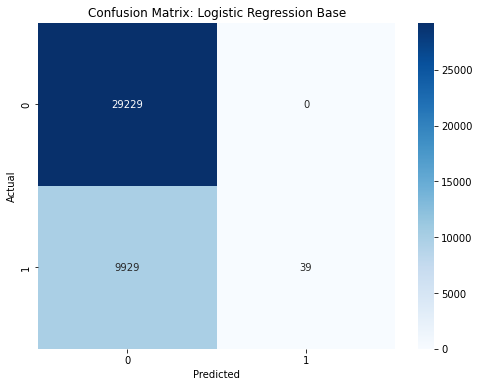

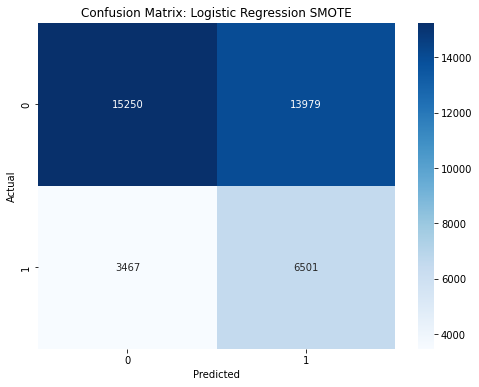

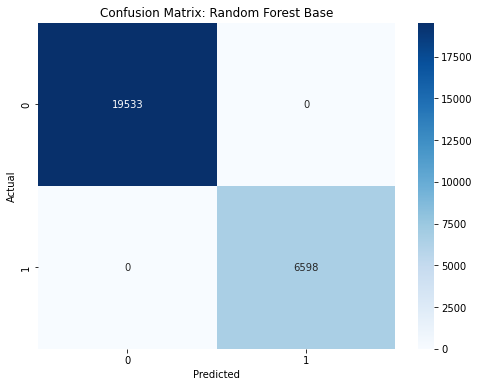

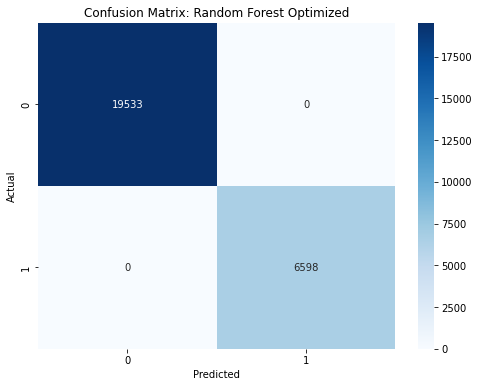

In [46]:
from tabulate import tabulate

results_df = pd.DataFrame(results)

# Mostrar el DataFrame final y los mejores parámetros
#print(results_df)
print(tabulate(results_df, headers='keys', tablefmt='psql'))
print("\nMejores parámetros encontrados por Randomized Search:")
print(best_params)

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Mostrar las matrices de confusión
plot_confusion_matrix(conf_matrix_log_base, "Confusion Matrix: Logistic Regression Base")
plot_confusion_matrix(conf_matrix_log_smote, "Confusion Matrix: Logistic Regression SMOTE")
plot_confusion_matrix(conf_matrix_rf_base, "Confusion Matrix: Random Forest Base")
plot_confusion_matrix(conf_matrix_rf_optimized, "Confusion Matrix: Random Forest Optimized")